In [1]:
import pandas as pd
import numpy as np

import datetime
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("df_new.csv")
#df["timestamp"] = pd.to_datetime(df["timestamp"])

In [8]:
#weather = pd.read_csv("cleaned_weather.csv")

In [9]:
df = df.drop(columns="Unnamed: 0")

In [10]:
df = df.set_index("timestamp_x")

In [11]:
set(df["stations"])

{3, 8, 24, 25, 26, 33, 34, 35, 39, 47, 55}

In [12]:
print(df.shape)

(19204, 14)


In [13]:
df.head()


,n_req,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce
timestamp_x,,,,,,,,,,,,,,
2010-01-02,134,3,BERGEN POINT,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,0,0.0,0
2010-01-02,131,25,KINGS POINT,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,0,0.0,0
2010-01-02,1365,26,LA GUARDIA AIRPORT,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,1,1.2,1
2010-01-02,361,39,NYC CENTRAL PARK,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,1,0.0,1
2010-01-02,209,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,1,0.0,1


In [53]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(df)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

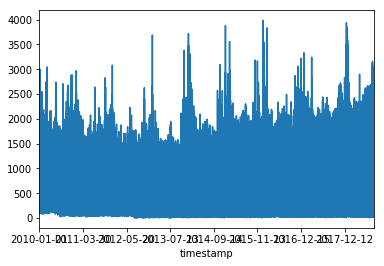

In [12]:
#ts_obj = df.loc[:,["timestamp", "n_req"]]
df = pd.read_csv("df.csv")
df = df.drop(columns="Unnamed: 0")
df = df.set_index("timestamp")
ts_obj = df["n_req"]
ts_obj.plot(x = "timestamp", y = "n_req")

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [46]:
train_ts = ts_obj.loc["2010-01-01":"2018-10-31"]
test_ts = ts_obj.loc["2018-11-01":"2018-11-12"]

In [71]:
train_ts = train_ts.groupby("timestamp").sum()
test_ts = test_ts.groupby("timestamp").sum()

In [72]:
train_fb = pd.DataFrame(train_ts)
train_fb['ds'] = train_ts.index
train_fb.columns = ["y", "ds"]

In [73]:
m = Prophet()
m.fit(train_fb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3233,2018-11-08,5465.654341,4706.485772,6285.542074
3234,2018-11-09,5312.943766,4569.864097,6097.817769
3235,2018-11-10,4594.137278,3866.379083,5337.192439
3236,2018-11-11,4443.264771,3699.567983,5186.681359
3237,2018-11-12,5532.242482,4816.096682,6302.236697


In [87]:
from sklearn.metrics import mean_squared_error

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

mape(y_true = test_ts.values, y_pred = forecast["yhat"][-12:].values)

0.20475921974397124

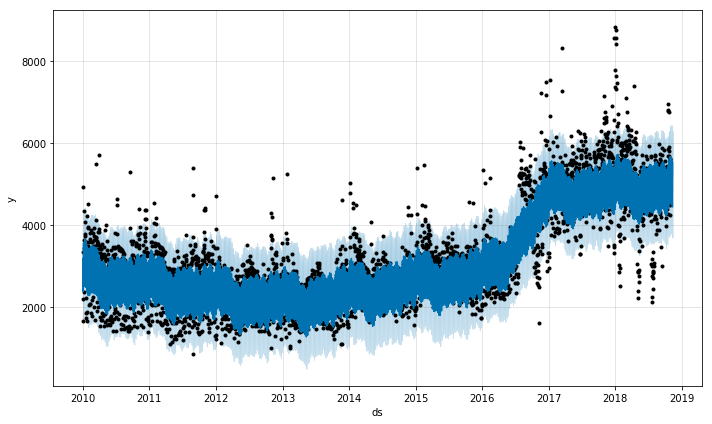

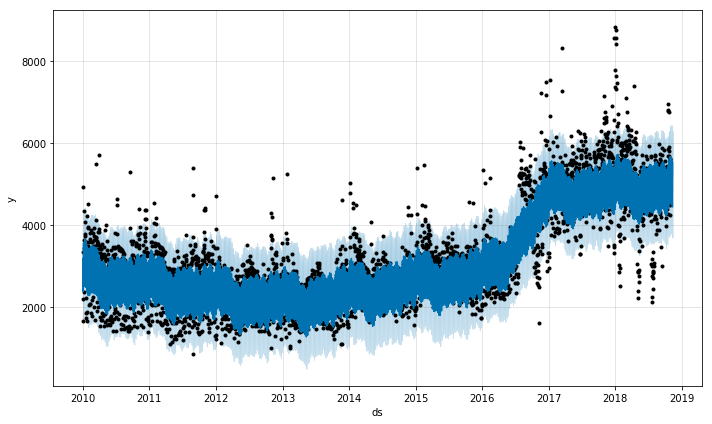

In [76]:
m.plot(forecast)

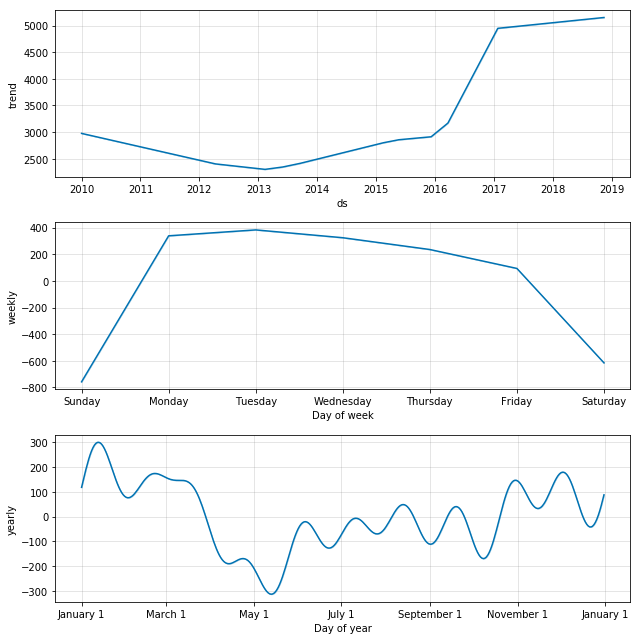

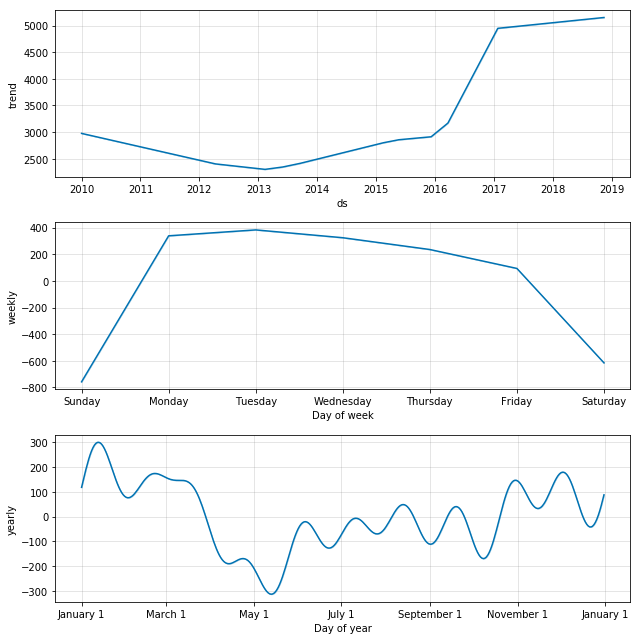

In [77]:
m.plot_components(forecast)

In [18]:
df = pd.get_dummies(df)

In [19]:
df.head()

,n_req,stations,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,...,StationName_CENTRAL PARK,StationName_JOHN F KENNEDY INTERNATIONAL AIRPORT,StationName_KINGS POINT,StationName_LA GUARDIA AIRPORT,StationName_MUNI ARPT TARANTINE FLD AP,StationName_NEW YORK CENTRAL PARK,StationName_NEW YORK CITY CENTRAL PARK,StationName_NYC CENTRAL PARK,StationName_PORT AUTH DOWNTN MANHATTAN WALL ST HEL,StationName_THE BATTERY
timestamp_x,,,,,,,,,,,,,,,,,,,,,
2011-01-01,170,3,36.7,31.3,44.1,40.134385,0.0,3.2,6.0,11.640780,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,233,24,34.8,30.0,39.9,26.100000,0.0,6.7,12.0,18.998047,...,0,1,0,0,0,0,0,0,0,0
2011-01-01,107,25,38.2,34.0,44.4,40.134385,0.0,4.9,8.0,14.154424,...,0,0,1,0,0,0,0,0,0,0
2011-01-01,969,26,40.8,29.1,46.0,26.200000,0.0,5.9,8.0,14.269215,...,0,0,0,1,0,0,0,0,0,0
2011-01-01,62,34,39.9,35.1,45.0,25.700000,0.0,5.0,15.0,22.280652,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df_target = df.loc["2010-01-02":,"n_req"]
df_target.head()

timestamp_x
2010-01-02     134
2010-01-02     209
2010-01-02     131
2010-01-02    1365
2010-01-02     361
Name: n_req, dtype: int64

In [21]:
df_target = df["n_req"]

In [22]:
df_feature = df.iloc[:, 2:]

In [23]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_feature, df_target, test_size = 0.25, random_state = 42)

In [61]:
train_labels = df_target.loc["2010-01-02":"2018-10-31"]
test_labels = df_target.loc["2018-11-01":"2018-11-13"]

train_features = df_feature.loc["2010-01-02":"2018-10-31"]
test_features = df_feature.loc["2018-11-01":"2018-11-13"]

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(n_estimators = 5000)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
predictions = rf.predict(test_features)

In [89]:

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

mape(y_true = test_labels.values, y_pred = predictions)

0.3167485943554145

In [90]:
feature_list = list(train_features.columns)

In [91]:
importances = list(rf.feature_importances_)

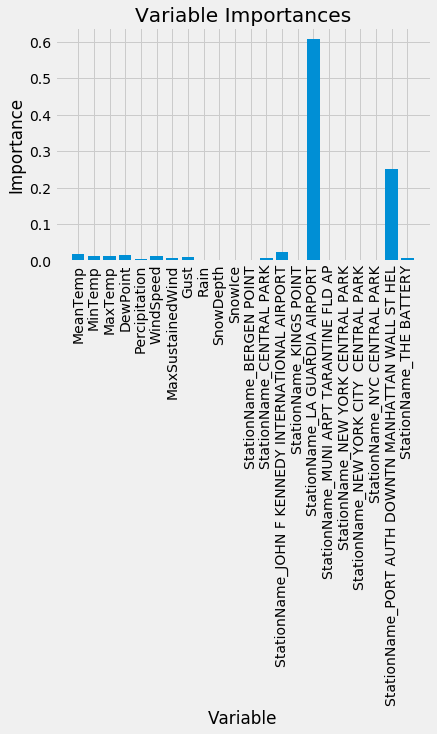

In [92]:
importances = list(rf.feature_importances_)
plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()
lr.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lr_predictions = lr.predict(test_features)
mape(y_true = test_labels.values, y_pred = lr_predictions)

0.33395911100057757

In [72]:
lr.coef_

array([ 5.58675798e-01, -1.02666181e+00,  1.91792803e-01, -4.96642397e-02,
        3.85045433e+00, -2.14313784e+00,  4.49184002e+00,  2.73372394e-01,
        9.15499053e+00,  8.99193315e+00,  4.73734191e+01, -2.20804207e+02,
       -4.67660231e+02, -6.85143967e+01, -2.46267150e+02,  1.16626305e+03,
       -4.92722682e+02, -3.60384583e+02, -2.17155807e+02, -9.34427893e+01,
        1.40419186e+03, -4.03503062e+02])

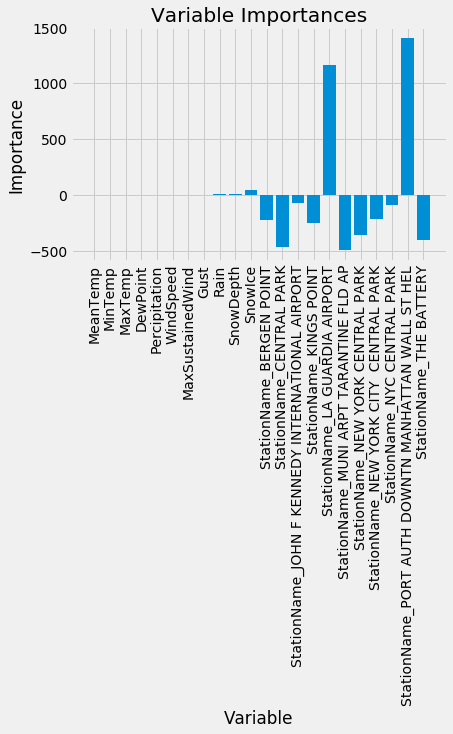

In [73]:
plt.style.use('fivethirtyeight')

x_values = list(range(len(lr.coef_)))
plt.bar(x_values, lr.coef_, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [75]:
from pyglmnet import GLM
glm = GLM(distr='poisson', alpha=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_features.values)
glm.fit(scaler.transform(train_features.values), train_labels)

poi_prediction = glm.predict(scaler.transform(test_features.values))
mape(y_true = test_labels.values, y_pred = poi_prediction)

0.6915537564710231

In [76]:
glm.reg_lambda

array([0.5       , 0.3237394 , 0.2096144 , 0.13572088, 0.08787639,
       0.0568981 , 0.03684031, 0.02385332, 0.01544452, 0.01      ])

In [77]:
import statsmodels.api as sm

In [78]:
poi_summary = sm.GLM(train_labels, train_features, family=sm.families.Poisson()).fit()

In [79]:
print(poi_summary.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  n_req   No. Observations:                16121
Model:                            GLM   Df Residuals:                    16099
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8898e+05
Date:                Tue, 06 Aug 2019   Deviance:                   6.5801e+05
Time:                        10:48:23   Pearson chi2:                 6.63e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
MeanTemp                                           

In [80]:
poi_predictions = poi_summary.predict(test_features)
mape(y_true = test_labels.values, y_pred = poi_predictions)

0.30136715009980064

In [114]:
df_n = pd.read_csv("df_n.csv")

In [115]:
df_n.head()

,Unnamed: 0,Unique Key,Complaint,timestamp_x,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce
0,48,21,water system,2010-01-02,3,BERGEN POINT,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,0,0.0,0
1,50,28,water system,2010-01-02,25,KINGS POINT,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,0,0.0,0
2,51,576,window guard,2010-01-02,26,LA GUARDIA AIRPORT,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,1,1.2,1
3,52,187,water system,2010-01-02,39,NYC CENTRAL PARK,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,1,0.0,1
4,49,56,water system,2010-01-02,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,1,0.0,1


In [116]:
#df_n["timestamp"] = pd.to_datetime(df_n["timestamp_x"])

In [117]:
df_n = df_n.set_index("timestamp_x")

In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_n["Complaint"])
#

LabelEncoder()

In [119]:
df_n["Complaint_label"] = le.transform(df_n["Complaint"])

In [120]:
Counter(df_n["Complaint"].values)

Counter({'water system': 16443,
         'window guard': 703,
         'traffic': 459,
         'other water': 396,
         'animal': 89,
         'other': 128,
         'vent': 272,
         'Taxi': 430,
         'sanitary': 273,
         'noise': 11})

C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [121]:
df_n.shape

(19204, 17)

In [122]:
df_n

,Unnamed: 0,Unique Key,Complaint,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce,Complaint_label
timestamp_x,,,,,,,,,,,,,,,,,
2010-01-02,48,21,water system,3,BERGEN POINT,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,0,0.0,0,8
2010-01-02,50,28,water system,25,KINGS POINT,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,0,0.0,0,8
2010-01-02,51,576,window guard,26,LA GUARDIA AIRPORT,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,1,1.2,1,9
2010-01-02,52,187,water system,39,NYC CENTRAL PARK,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,1,0.0,1,8
2010-01-02,49,56,water system,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,1,0.0,1,8
2010-01-03,98,70,window guard,3,BERGEN POINT,31.6,24.1,39.6,40.134385,0.00,11.7,21.0,30.005250,0,0.0,0,9
2010-01-03,99,147,water system,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,30.5,21.0,41.0,19.700000,0.01,17.4,28.0,35.000000,1,0.0,1,8
2010-01-03,101,1149,window guard,26,LA GUARDIA AIRPORT,29.2,19.9,39.0,20.500000,0.01,16.8,26.0,35.000000,1,0.0,1,9
2010-01-03,102,346,water system,39,NYC CENTRAL PARK,28.8,19.0,39.9,18.200000,0.01,9.5,15.9,27.000000,0,0.0,1,8


In [123]:
df_target = df_n.loc[:,"Complaint_label"]
df_feature = df_n.iloc[:, 4:-1]
df_feature = df = pd.get_dummies(df_feature)

In [124]:
train_labels = df_target.loc["2010-01-02":"2018-10-31"]
test_labels = df_target.loc["2018-11-01":"2018-11-13"]

train_features = df_feature.loc["2010-01-02":"2018-10-31"]
test_features = df_feature.loc["2018-11-01":"2018-11-13"]

In [131]:
df_feature.shape

(19204, 22)

In [125]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_feature, df_target, test_size = 0.25, random_state = 42)

In [133]:
train_features.shape
test_features.shape

(4801, 22)

In [126]:
from sklearn.linear_model import LogisticRegression

In [136]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(train_features, train_labels)

C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
lr_predictions = lr.predict(test_features)
(lr_predictions == test_labels.values).mean()
#mape(y_true = test_labels.values, y_pred = lr_predictions)

0.8579462611955843

In [193]:
confusion_matrix(y_true=test_labels.values, y_pred=lr_predictions)

array([[   2,    0,    0,    0,    0,    0,    0,    0,  115,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,   24,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    5,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,   28,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   96,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   66,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  101,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   72,    0],
       [   7,    0,    0,    0,    0,    1,    0,    0, 4116,    9],
       [   0,    0,    0,    0,    0,    0,    0,    0,  156,    1]],
      dtype=int64)

In [187]:
f1_score(y_pred=lr_predictions, y_true=test_labels.values, average='macro')

0.09669244321052686

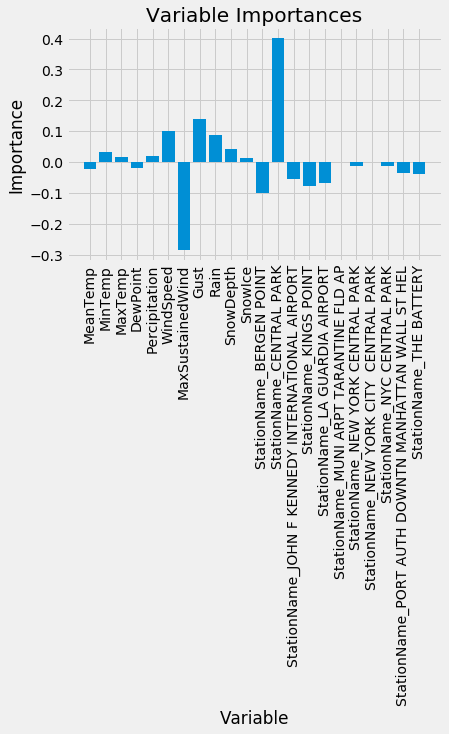

In [166]:
imp = lr.coef_[0,:]
feature_list = list(train_features.columns)

plt.style.use('fivethirtyeight')

x_values = list(range(imp.shape[0]))
plt.bar(x_values, imp, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


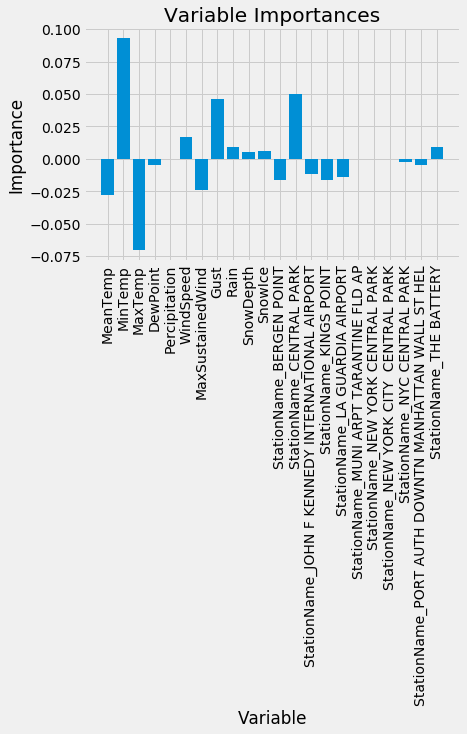

In [167]:
imp = lr.coef_[1,:]
feature_list = list(train_features.columns)

plt.style.use('fivethirtyeight')

x_values = list(range(imp.shape[0]))
plt.bar(x_values, imp, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [177]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
clf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
clf_predictions = clf.predict(test_features)
(clf_predictions == test_labels.values).mean()
#mape(y_true = test_labels.values, y_pred = lr_predictions)

0.860862320349927

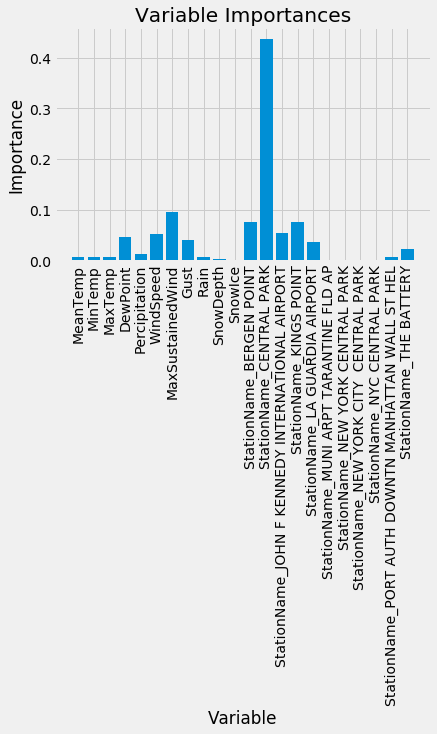

In [179]:
importances = list(clf.feature_importances_)
plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [182]:
from sklearn.metrics import f1_score

In [185]:
f1_score(y_pred=clf_predictions, y_true=test_labels.values, average='macro')

C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.09252294604880232

In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels.values, y_pred=clf_predictions)

array([[   0,    0,    0,    0,    0,    0,    0,    0,  117,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   25,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    5,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   29,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   96,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   66,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  101,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   72,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4133,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  157,    0]],
      dtype=int64)

In [192]:
set(clf_predictions)

{8}

In [ ]:
!pip install -U imbalanced-learn

In [196]:
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X, y)

ImportError: cannot import name '_astype_copy_false' from 'sklearn.utils.fixes' (C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [197]:
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

SyntaxError: invalid syntax (<ipython-input-197-f648dd2d4ae4>, line 1)